<a href="https://colab.research.google.com/github/Anoma9/PythonProjects/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS IS A SENTIMENT ANALYSIS PROGRAM THAT PARSES THE TWEETS FETCHED FROM TWITTER USING PYTHON 

In [1]:
#IMPORTING LIBRARIES 
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
#UPLOAD THE DATA
from google.colab import files
uploaded = files.upload()

Saving Logins.csv to Logins (1).csv


In [3]:
# READ THE DATA
log = pd.read_csv('Logins.csv')
log

,Keys
0,RuJA4Sn3eDRxkCHd6FGEcZOVC
1,PjhjFPm3pc1NzYljXaMTBqf3eEDx95wUe4LGXskLHVbUTg...
2,1052734736559468544-Udxae2N4lVxIofFJo6hDeJVgL7...
3,S8fRd1nlinPLOxO5Qu7pgJVSMRNn469wHXN4F6xOmE3Oq


In [4]:
#TWITTER API CREDENTIALS
consumer_key = log['Keys'][0]
consumer_secret = log['Keys'][1]
access_token = log['Keys'][2]
access_token_secret = log['Keys'][3]

In [5]:
#CREATE THE AUTENTICATION OBJECT
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

#SET THE ACCESS TOKEN AND ACCESS TOKEN SECRET
authenticate.set_access_token(access_token, access_token_secret)

#CREATE THE API OBJECT WHILE PASSING IN THE AUTHENTICATE INFORMATION
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
#EXTRACT 100 TWEETS FROM THE TWITTER USER
posts = api.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")
#PRINT THE LAST 5 TWEETS FROM THE ACCOUNT
print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i)+')'+ tweet.full_text + '\n')
  i = i+1


Show the 5 recent tweets: 

1)I can’t believe this was 15 years ago. I always enjoyed the @allthingsd conference. https://t.co/L4fIBNYNPU

2)@waltmossberg @Kodak Reconnecting with Steve was fantastic. And for the record, I wasn’t reluctant to take the photo. But I do wish I had an opportunity to run a comb through my hair first.

3)Incredible. @lionheart1759
https://t.co/6PqLbrJgz8

4)I recently met with 33 graduate students and a few leading scientists about how to make sure disease outbreaks don’t go global: https://t.co/nDHQh9sOLE https://t.co/3DSbMvnO7V

5)While there are many great commencement speeches, I found this one from my friend Reid particularly insightful. https://t.co/AHkDOwHGoF



In [7]:
#CREATE A DATAFRAME WITH A COLUMN CALLED TWEETS
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['tweets'])

#SHOW THE FIRST 5 ROWS OF DATA
df.head()

,tweets
0,I can’t believe this was 15 years ago. I alway...
1,@waltmossberg @Kodak Reconnecting with Steve w...
2,Incredible. @lionheart1759\nhttps://t.co/6PqLb...
3,I recently met with 33 graduate students and a...
4,While there are many great commencement speech...


In [8]:
#CLEANING THE DATA

#CREATE A FUNCTION TO CLEAN THE TWEETS; the r tells python that it is a raw string
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text) #removes the @mentions
  text = re.sub(r'#','',text) #removes #symbols
  text = re.sub(r'RT[\s]+', '', text) #removes RTs
  text = re.sub(r'https?:\/\/\S+', '', text) #removes the hyperlink in a test

  return text
#CLEANING THE TEST
df['tweets'] = df['tweets'].apply(cleanTxt)

#SHOW CLEAN TEXT
df.head()

,tweets
0,I can’t believe this was 15 years ago. I alway...
1,Reconnecting with Steve was fantastic. And f...
2,Incredible. \n
3,I recently met with 33 graduate students and a...
4,While there are many great commencement speech...


In [9]:
#CREATE A FUNCTION TO GET THE SUBJECTIVITY
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#CREATE A FUNCTION TO GET THE POLARITY; tells how positive or negative the text is
def gotPolarity(text):
  return TextBlob(text).sentiment.polarity

#CREATE TWO NEW COLUMNS; subjectivity and polarity
df['subjectivity'] = df['tweets'].apply(getSubjectivity)
df['polarity'] = df['tweets'].apply(gotPolarity)



In [10]:
#SHOW THE NEW DATATFRAME WITH THE NEW COLUMNS
df

,tweets,subjectivity,polarity
0,I can’t believe this was 15 years ago. I alway...,0.700000,0.500000
1,Reconnecting with Steve was fantastic. And f...,0.616667,0.325000
2,Incredible. \n,0.900000,0.900000
3,I recently met with 33 graduate students and a...,0.309722,0.075000
4,While there are many great commencement speech...,0.527778,0.488889
...,...,...,...
95,I’m optimistic about our ability to prevent th...,0.400000,0.177778
96,The Global Fund is one of the best investments...,0.194444,0.166667
97,"At the end of the day, Paul’s most lasting imp...",0.425000,0.325000
98,His work will continue through Partners in Hea...,0.700000,0.700000


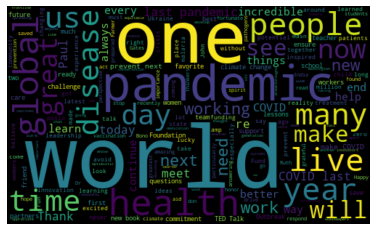

In [11]:
#SHOWING HOW THE SENTIMENTS ARE DISTRIBUTED BY PLOTTING A WORDCLOUD
all_words = ' '.join( [twts for twts in df['tweets']] )
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [12]:
#CREATE A FUNCTION TO COMPUTE THE NEGATIVE, NEUTRAL AND POSITIVE ANALYSIS
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

df['analysis'] = df['polarity'].apply(getAnalysis)

#SHOW THE DATAFRAME
df

,tweets,subjectivity,polarity,analysis
0,I can’t believe this was 15 years ago. I alway...,0.700000,0.500000,Positive
1,Reconnecting with Steve was fantastic. And f...,0.616667,0.325000,Positive
2,Incredible. \n,0.900000,0.900000,Positive
3,I recently met with 33 graduate students and a...,0.309722,0.075000,Positive
4,While there are many great commencement speech...,0.527778,0.488889,Positive
...,...,...,...,...
95,I’m optimistic about our ability to prevent th...,0.400000,0.177778,Positive
96,The Global Fund is one of the best investments...,0.194444,0.166667,Positive
97,"At the end of the day, Paul’s most lasting imp...",0.425000,0.325000,Positive
98,His work will continue through Partners in Hea...,0.700000,0.700000,Positive


In [18]:
#PRINT ALL OF THE POSITIVE TWEETS
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['analysis'][i]=='Positive'):
    print(str(j) + ')'+sortedDF['tweets'][i], '\n')
    print()
    j=j+1

1)I can’t believe this was 15 years ago. I always enjoyed the  conference.  


2)  Reconnecting with Steve was fantastic. And for the record, I wasn’t reluctant to take the photo. But I do wish I had an opportunity to run a comb through my hair first. 


3)Incredible. 
 


4)I recently met with 33 graduate students and a few leading scientists about how to make sure disease outbreaks don’t go global:   


5)While there are many great commencement speeches, I found this one from my friend Reid particularly insightful.  


6) It was great to meet Dr  and exchange perspectives on global health. India's success with the vaccination drive and the use of technology to drive health outcomes at scale offers many lessons for the world. 


7)Happy to meet Prime Minister  and members of his government today in Madrid. Great to see his leadership and commitment to addressing some of the most pressing global challenges, particularly more equity in global health, climate change and food security.  


In [19]:
#PRINT THE NEGATIVE TWEETS
j=1
sortedDF = df.sort_values(by=['polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['analysis'][i]=='Negative'):
    print(str(j) + ')'+sortedDF['tweets'][i], '\n')
    print()
    j=j+1

1)To avoid another COVID-19 – or worse – the world needs a full-time, paid team whose entire job is to prevent pandemics. I call it GERM:  


2)We can’t reach zero carbon emissions without innovation. In this new series, you’ll meet some people who are on the cutting edge of clean energy: 
EarthDay  


3)Preventing the next pandemic is not cheap, but it'll save lives and money in the long run. The IMF estimates that COVID will cost nearly $14 trillion. We can save trillions by spending billions.  


4)Changing mindsets is never easy, but Sudha Varghese empowers girls to believe in themselves and see their potential for greatness:   


5)Kakenya Ntaiya founded  to enable girls’ education and end harmful traditional practices like child marriage. Her story is a powerful example of how one person’s act of bravery can spark dramatic change.   


6): I’ve spent my life working in agriculture, so when I think beyond the humanitarian toll I’m seeing in Ukraine, my focus a… 




<function matplotlib.pyplot.show>

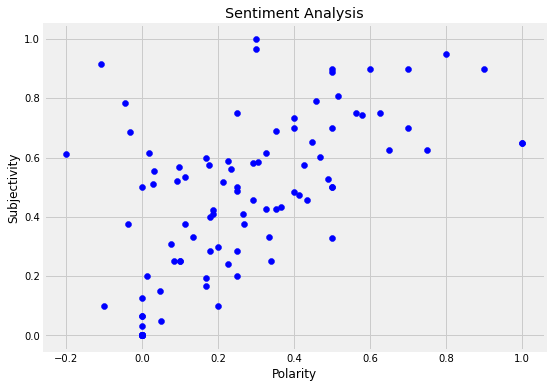

In [22]:
#SHOW THE POLARITY AND SUBJECTIVITY VIZ
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [31]:
# SHOW THE PERCENTAGE OF POSITIVE TWEETS
ptweets = df[df.analysis=='Positive']
ptweets = ptweets['tweets']

round(ptweets.shape[0] / df.shape[0] *100,1)

77.0

In [32]:
# SHOW THE PERCENTAGE OF NEGATIVE TWEETS
ptweets = df[df.analysis=='Negative']
ptweets = ptweets['tweets']

round(ptweets.shape[0] / df.shape[0] *100,1)

6.0

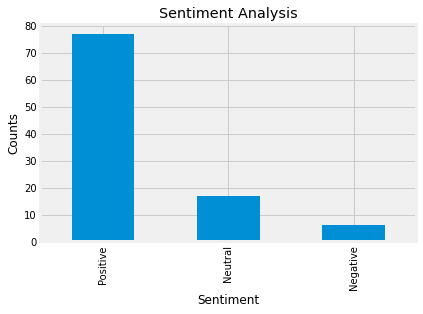

In [37]:
#SHOW THE VALUE COUNTS OF 
df['analysis'].value_counts()

#SHOW THE VIZUALIZATION OF THE COUNTS
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['analysis'].value_counts().plot(kind='bar')